In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

rng = np.random.default_rng(2718)
np.random.seed(2718)

# Streaks

Streaks are really common. This iis one of those places where our intuitive notion of randomness and actual randomness collide. Imagine I asked you to try and randomly write a sequence of "W"'s and "L"'s to simulate a team's win-loss record. I could probably tell that it was fake. You might get the winning percentage correct, but your results would probably be less "streaky" than an actual sequence of winners. [Joseph Buchdal](https://www.football-data.co.uk/blog/Wald_Wolfowitz.php) actually did an experiment, and found that he couldn't create a win-loss record that would fool a statistical test called the Wald-Wolfowitz test. 

Streaks of wins and losses in randomly generated data follow regular mathematical laws, ones our brains don't want to follow when asked to do the exercise. At some level, we're almost physically incapable of generating truly random data, so it makes sense to me that our intuitions about randomness are a little off.

To see this in action, let's generate some streaks.

In [ ]:
def streaks(skill=.5, season_length=1000):
    # this will give us 1's and zeroes
    fake_season = pd.Series(np.random.rand(season_length) < skill).astype("float")
    as_win_loss = fake_season.replace(0.0, "L").replace(1.0, "W")
    as_str = "".join(as_win_loss)
    win_streaks  = re.findall(r"(W{1,}+)", as_str)
    lose_streaks = re.findall(r"(L{1,}+)", as_str)

    win_lengths = pd.Series(map(len, win_streaks))
    lose_lengths = pd.Series(map(len, lose_streaks))

    return {
        'win_lengths': win_lengths.value_counts(),
        'lose_lengths': lose_lengths.value_counts(),
        'win_streaks': win_streaks,
        'lose_streaks': lose_streaks,
        'wins': as_str.count("W"),
        'losses': as_str.count("L")
        }




First off, a mathematical intuition check. Does the win rate affect the number of winning versus losing streaks? A team or a gambler that is good will have fewer losing streaks, right?

In one sense, yes, in another, no. There can be at most one more winning streak than losing streak no matter the win rate. Every time a winning streak ends, a losing streak begins, and vice versa.

But there will definitely be fewer streaks total as the win rate goes up. The winning streaks will be longer, the losing streaks shorter. There will be fewer opportunities for the winners to metaphorically pass the baton to the losers, and vice versa.

How many streaks total should we expect? Over the course of this simulated 1000 game season, we get 498 streaks, roughly half the number of total games. Seems like a lot, right?

In [ ]:
ok_bettor_season = streaks(skill=.55, season_length=1000)

In [ ]:
len(ok_bettor_season['win_streaks']) + len(ok_bettor_season['lose_streaks'])

498

Our theoretical gambler has a 55% win rate but only managed to win 53.2% of them in this simulation.

In [ ]:
ok_bettor_season['wins']

532

In [ ]:
ok_bettor_season['losses']

468

The theoretical number of streaks for a 532-468 win loss record is 498, matching the actual number exactly.

In [ ]:
(2 * (532 * 468) / 1000) + 1

497.952

We could take the random results and shuffle around wins and losses to create more or fewer streaks but keep the same win rate. The more we try to "cook" the books, the more we come up with a record that is unlikely to be created by randomness, which makes sense.

This statistical test has been used to try to prove or disprove the "hot hand" -- the idea that some shooters are streaky. In this context, being "streaky" would mean more makes in a row and more misses in a row than expected by chance. In other words, fewer streaks in general because the wins and losses tend to cluster together more.

Although [the original paper](https://www.sciencedirect.com/science/article/abs/pii/0010028585900106) found that the hot hand doesn't exist, it has remained a topic of debate for decades, one that I'm not going to get into here!

How frequently will a 55% win rate gambler see different length streaks over the course of 1000 bets on the NBA?

In [5]:
ok_bettor = streaks(skill=.55, season_length=10000000)

This gives us an idea of the expected number of streaks over the course of 1000 bets. A bettor should expect about 10 five game winning streaks and 12 streaks longer than five.

In [35]:
win_streak_ev = ok_bettor['win_lengths'] / 10000
win_streak_ev

1     111.3708
2      61.1969
3      33.6722
4      18.5548
5      10.1693
6       5.6057
7       3.1057
8       1.6762
9       0.9285
10      0.5265
11      0.2794
12      0.1509
13      0.0883
14      0.0500
15      0.0251
16      0.0154
17      0.0081
18      0.0040
19      0.0024
20      0.0010
21      0.0006
22      0.0002
23      0.0002
25      0.0001
Name: count, dtype: float64

In [32]:
sum(win_streak_ev[win_streak_ev.index > 5])

12.4683

As expected, if we take the streak counts times the streak lengths and sum those up, we get the expected number of wins in 1000 bets (550).

In [12]:
sum(win_streak_ev * win_streak_ev.index)

549.9065

On the losing side, a pretty good bettor should expect at least 4 or 5 stretches every season where they lose 6 or more games in a row.

In [28]:
lose_streak_ev = ok_bettor['lose_lengths'] / 10000
lose_streak_ev

1     136.0270
2      61.2545
3      27.5563
4      12.4264
5       5.5860
6       2.5070
7       1.1446
8       0.5138
9       0.2318
10      0.1010
11      0.0450
12      0.0218
13      0.0099
14      0.0040
15      0.0014
16      0.0009
17      0.0008
19      0.0001
Name: count, dtype: float64

In [29]:
sum(lose_streak_ev[lose_streak_ev.index >= 6])

4.582099999999999

And they can expect to have a 10 or more game losing streak once every 5.4 seasons.

In [20]:
1 /sum(lose_streak_ev[lose_streak_ev.index >= 10])

5.408328826392644

[FIXME: clean up!]

So if I plot the probability of each streak by the streak length, that would give the proportion of the time that the bettor spent within each streak length. 

This produces a really odd graph, where the individual probabilities make sense but the overall shape is weird.


In [21]:
lose_frequencies = ok_bettor['lose_lengths'] * ok_bettor['lose_lengths'].index /100000
win_frequencies = ok_bettor['win_lengths'] * ok_bettor['win_lengths'].index /100000

lose_frequencies.index = lose_frequencies.index * -1

win_and_lose = pd.concat([win_frequencies, lose_frequencies]).sort_index()


<Axes: >

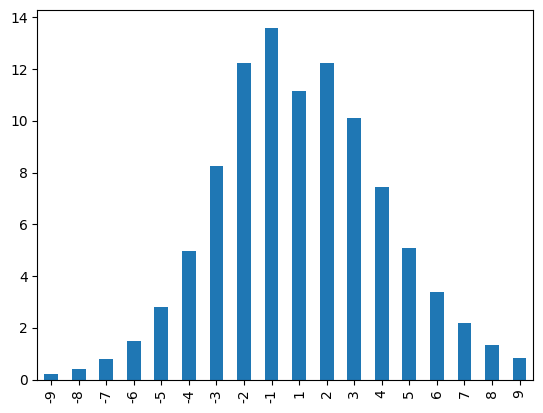

In [24]:
win_and_lose[(win_and_lose.index > -10) & (win_and_lose.index < 10) ].plot.bar()